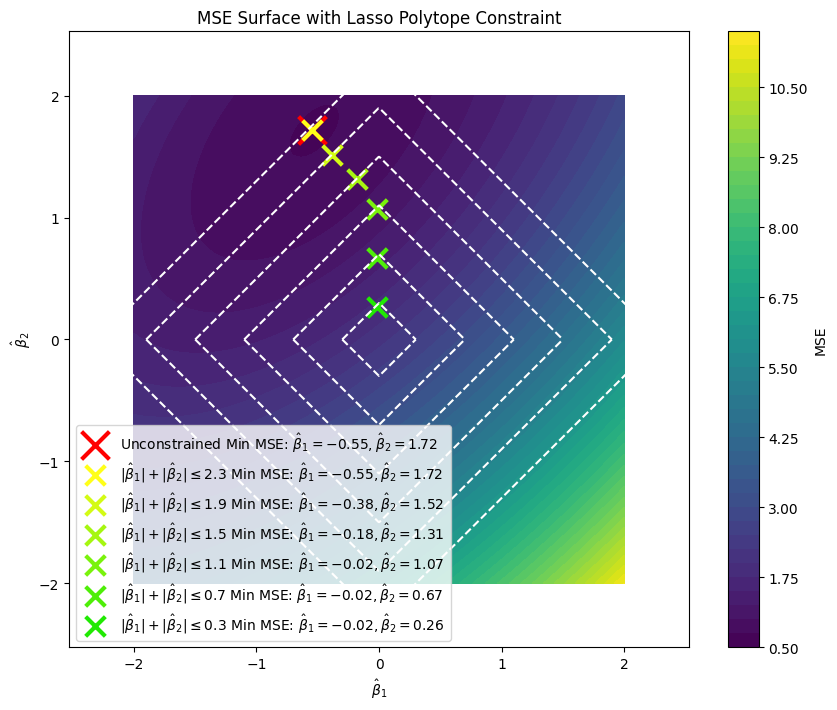

Ridge:
lambda	Bias^2	Variance	MSE
0.0001	1.7752	3.1767		4.9519
0.0002	1.9064	3.2986		5.2051
0.0003	1.8579	3.2437		5.1015
0.0004	1.9031	3.2108		5.1139
0.0007	1.8600	4.2846		6.1445
0.0011	1.7750	2.6170		4.3920
0.0017	1.8648	3.2759		5.1407
0.0028	1.7435	3.1307		4.8742
0.0045	1.6644	3.5199		5.1843
0.0073	1.7237	3.0301		4.7538
0.0117	1.9353	3.1514		5.0867
0.0189	1.8533	3.3194		5.1727
0.0304	1.8488	2.7574		4.6063
0.0489	1.7686	2.6934		4.4620
0.0788	1.7274	2.5328		4.2602
0.1269	1.7924	2.3329		4.1253
0.2043	1.6851	2.4030		4.0882
0.3290	1.7242	2.3124		4.0367
0.5298	1.6647	2.2118		3.8765
0.8532	1.7742	1.8991		3.6733
1.3738	1.7511	1.5894		3.3406
2.2122	1.8441	1.5322		3.3763
3.5622	2.0746	1.3087		3.3833
5.7362	2.6893	1.3378		4.0271
9.2367	3.5761	1.2994		4.8755
14.8735	4.8110	1.2822		6.0932
23.9503	6.3790	1.3206		7.6996
38.5662	8.6156	1.2118		9.8273
62.1017	10.8728	0.9825		11.8554
100.0000	13.9980	0.8293		14.8273

Lasso:
lambda	Bias^2	Variance	MSE
0.0001	1.8387	2.8211		4.6598
0.0002	1.7530	3.4948		

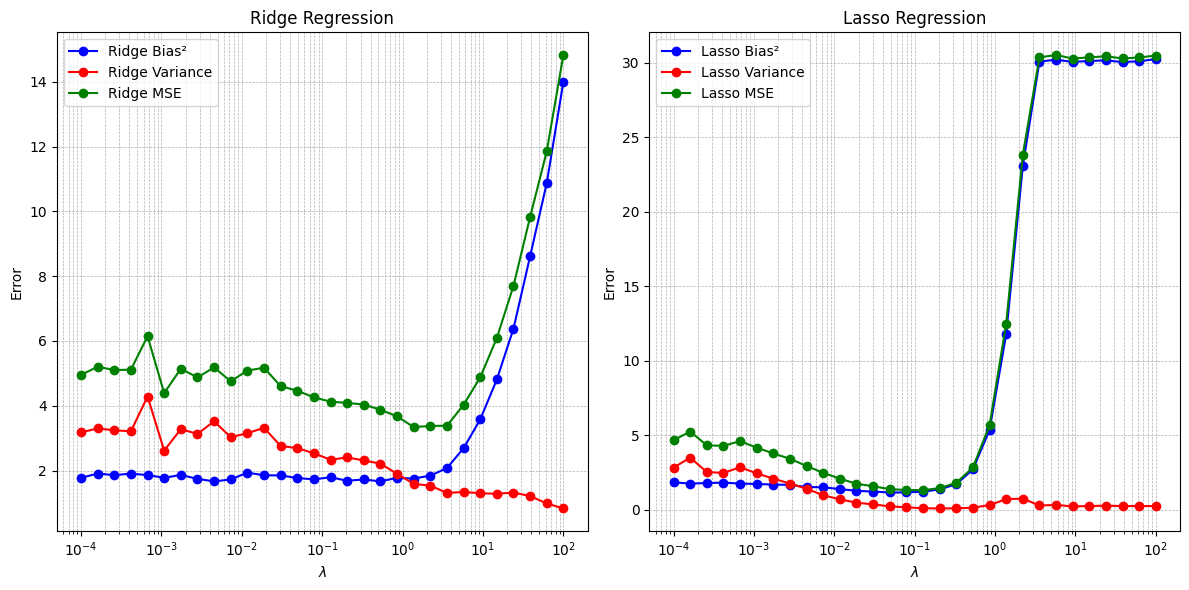

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

# predictor Lasso Polytope Visualization
def mse(beta_1, beta_2, X1, X2, y):
    y_pred = beta_1 * X1 + beta_2 * X2
    return np.mean((y - y_pred) ** 2)
# Generate some synthetic data for the regression
np.random.seed(42)
X1 = np.random.uniform(-1, 1, 20)
X2 = np.random.uniform(-1, 1, 20)
true_beta_1, true_beta_2 = -1.0, 1.0
y = true_beta_1 * X1 + true_beta_2 * X2 + np.random.normal(scale=1.0, size=len(X1))
# Create a grid of beta_0 and beta_1 values

beta_1_range = np.linspace(-2, 2, 100)
beta_2_range = np.linspace(-2, 2, 100)
beta_1_grid, beta_2_grid = np.meshgrid(beta_1_range, beta_2_range)
# Compute MSE values for the grid

mse_values = np.zeros_like(beta_1_grid)
for i in range(beta_1_grid.shape[0]):
    for j in range(beta_1_grid.shape[1]):
        mse_values[i, j] = mse(beta_1_grid[i, j], beta_2_grid[i, j], X1, X2, y)
# Find the minimum MSE and its location

min_idx = np.unravel_index(np.argmin(mse_values), mse_values.shape)
min_beta_1, min_beta_2 = beta_1_grid[min_idx], beta_2_grid[min_idx]
# Plot the MSE surface

plt.figure(figsize=(10,8))
contour = plt.contourf(beta_1_grid, beta_2_grid, mse_values, levels=50, cmap='viridis')
plt.colorbar(contour, label="MSE")
plt.scatter(min_beta_1, min_beta_2, color='red', marker='x', s=400, linewidths=3,
            label=rf"Unconstrained Min MSE: $\hat\beta_1={min_beta_1:.2f}, \hat\beta_2={min_beta_2:.2f}$")

max_c = 2.3
electric_green = np.array([0, 230, 0])
laser_lemon = np.array([255, 255, 25])
for lasso_c in np.arange(max_c, 0, -0.4):
      # Compute the blended color (the colors span green-yellow range)
    col = laser_lemon * (lasso_c / max_c) + electric_green * (1 - lasso_c / max_c)
    col = col / 255.0
        # Apply the Lasso constraint |β_1| + |β_2| <= c
    lasso_constraint = np.abs(beta_1_grid) + np.abs(beta_2_grid) <= lasso_c
    constrained_mse = np.where(lasso_constraint, mse_values, np.inf)
    constrained_min_idx = np.unravel_index(np.argmin(constrained_mse), mse_values.shape)
    constrained_min_beta_1 = beta_1_grid[constrained_min_idx]
    constrained_min_beta_2 = beta_2_grid[constrained_min_idx]
        # Mark the constrained minimum within the Lasso polytype with a violet X
    plt.scatter(constrained_min_beta_1, constrained_min_beta_2, color=col, marker='x', s=200, linewidths=3,
                label=rf"$| \hat\beta_1 | + | \hat\beta_2 | \leq {lasso_c:.1f}$ Min MSE: $\hat\beta_1={constrained_min_beta_1:.2f}, \hat\beta_2={constrained_min_beta_2:.2f}$")
    lasso_boundary = np.linspace(-lasso_c, lasso_c, 500)
        # Top and bottom boundaries
    plt.plot(lasso_boundary, lasso_c - np.abs(lasso_boundary), color='white', linestyle='--')
    plt.plot(lasso_boundary, -lasso_c + np.abs(lasso_boundary), color='white', linestyle='--')
# Add labels and legend

plt.xlabel(r"$\hat\beta_1$")
plt.ylabel(r"$\hat\beta_2$")
plt.title("MSE Surface with Lasso Polytope Constraint")
plt.legend()
plt.show()


# simulation for bias-variance trade-off
np.random.seed(42)
# Generate high-dimensional synthetic data
n_samples, n_features, n_informative, sigma = 100, 50, 5, 1.0
true_beta = np.zeros(n_features)
non_zero_indices = np.random.choice(n_features, n_informative, replace=False)
true_beta[non_zero_indices] = np.random.uniform(1.0, 5.0, size=n_informative)
# Generate training data
X_syn = np.random.normal(0, 1, size=(n_samples, n_features))
y_syn = X_syn.dot(true_beta) + np.random.normal(0, sigma, size=n_samples)
# Generate a large fixed test set
X_test_large = np.random.normal(0, 1, size=(1000, n_features))
y_test_large = X_test_large.dot(true_beta) + np.random.normal(0, sigma, size=1000)

# lambda
lambdas = np.logspace(-4, 2, 30)
n_simulations = 100

# simulate model predictions and compute bias, variance, and MSE
def simulate_model(model_class, alpha, X_train, y_train, X_test, y_test):
    predictions = np.zeros((n_simulations, len(y_test)))
    for i in range(n_simulations):
        indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
        X_train_boot = X_train[indices]
        y_train_boot = y_train[indices]
        model = model_class(alpha=alpha, max_iter=10000)
        model.fit(X_train_boot, y_train_boot)
        predictions[i, :] = model.predict(X_test)
    avg_pred = np.mean(predictions, axis=0)
    bias2 = np.mean((avg_pred - y_test)**2)
    variance = np.mean(np.var(predictions, axis=0))
    mse_val = np.mean((predictions - y_test.reshape(1, -1))**2)
    return bias2, variance, mse_val

# results for Ridge and Lasso
ridge_bias2, ridge_variance, ridge_mse = [], [], []
lasso_bias2, lasso_variance, lasso_mse = [], [], []

# Simulate for each lambda value
for lam in lambdas:
    b2, var, mse_val = simulate_model(Ridge, lam, X_syn, y_syn, X_test_large, y_test_large)
    ridge_bias2.append(b2)
    ridge_variance.append(var)
    ridge_mse.append(mse_val)

    b2, var, mse_val = simulate_model(Lasso, lam, X_syn, y_syn, X_test_large, y_test_large)
    lasso_bias2.append(b2)
    lasso_variance.append(var)
    lasso_mse.append(mse_val)

ridge_bias2 = np.array(ridge_bias2)
ridge_variance = np.array(ridge_variance)
ridge_mse = np.array(ridge_mse)
lasso_bias2 = np.array(lasso_bias2)
lasso_variance = np.array(lasso_variance)
lasso_mse = np.array(lasso_mse)

# results for Ridge
print("Ridge:")
print("lambda\tBias^2\tVariance\tMSE")
for lam, b2, var, mse_val in zip(lambdas, ridge_bias2, ridge_variance, ridge_mse):
    print(f"{lam:.4f}\t{b2:.4f}\t{var:.4f}\t\t{mse_val:.4f}")

# results for Lasso
print("\nLasso:")
print("lambda\tBias^2\tVariance\tMSE")
for lam, b2, var, mse_val in zip(lambdas, lasso_bias2, lasso_variance, lasso_mse):
    print(f"{lam:.4f}\t{b2:.4f}\t{var:.4f}\t\t{mse_val:.4f}")

# Plot
plt.figure(figsize=(12,6))

# Ridge plot
plt.subplot(1,2,1)
plt.plot(lambdas, ridge_bias2, 'bo-', label='Ridge Bias²')
plt.plot(lambdas, ridge_variance, 'ro-', label='Ridge Variance')
plt.plot(lambdas, ridge_mse, 'go-', label='Ridge MSE')
plt.xscale('log')
plt.xlabel(r'$\lambda$')
plt.ylabel('Error')
plt.title('Ridge Regression')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Lasso plot
plt.subplot(1,2,2)
plt.plot(lambdas, lasso_bias2, 'bo-', label='Lasso Bias²')
plt.plot(lambdas, lasso_variance, 'ro-', label='Lasso Variance')
plt.plot(lambdas, lasso_mse, 'go-', label='Lasso MSE')
plt.xscale('log')
plt.xlabel(r'$\lambda$')
plt.ylabel('Error')
plt.title('Lasso Regression')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


## Wpływ zmiany parametru **λ** na bias i wariancję

zakładając (rozdział 7.3, ESL):
$$
Y = f(X) + \varepsilon,\quad \mathrm{E}(\varepsilon)=0,\quad \operatorname{Var}(\varepsilon)=\sigma_{\varepsilon}^2,
$$
oczekiwana wartość błędu predykcji w punkcie $x_0$ może zostać przedstawiona jako:
$$
\operatorname{Err}(x_0) = \sigma_{\varepsilon}^2 + \Bigl[\mathrm{E}\hat{f}(x_0)-f(x_0)\Bigr]^2 + \operatorname{Var}\left[\hat{f}(x_0)\right].
$$

Bias$^2$ to  
$$
\Bigl[\mathrm{E}\hat{f}(x_0)-f(x_0)\Bigr]^2,
$$  

Variance to  
$$
\operatorname{Var}\left[\hat{f}(x_0)\right],
$$  

noise to  
$$
\sigma_{\varepsilon}^2.
$$
Im bardziej skomplikowany model, tym niższy bias, ale wyższa wariancja  


Mała λ: model z małymi karmi, oznacza to niski bias, wysoką wariancję, czyli przeuczenie.\
Duża λ: model z dużymi karami, oznacza to wysoki bias, niska wariancja, czyli "niedouczenie".

MSE:
$$
\mathrm{MSE} = \mathrm{Bias}^2 + \mathrm{Variance} + \sigma_{\varepsilon}^2,
$$
jeśli MSE ma kształt krzywej U, to oznacza, że istnieje optymalna λ, minimalizująca MSE (wartość λ, dla której: $\mathrm{Bias}^2 + \mathrm{Variance}$ jest minimalna).

$$
\operatorname{Err}(x_0)=\sigma_{\varepsilon}^2+\operatorname{Bias}^2\left(\hat{f}(x_0)\right)+\operatorname{Var}\left(\hat{f}(x_0)\right).
$$

Pierwszy składnik to nieunikniony szum, drugi to kwadrat biasu, czyli różnica między średnią wartością predykcji a prawdziwą wartością, a trzeci to wariancja predykcji modelu - ESL, 7.2 i 7.3

W naszym przypadku:\
1) Bias$^2$ to średnia różnica kwadratowa między uśrednionymi predykcjami (z 100 symulacji) a rzeczywistą wartością y. \
2) Variance to średnia zmienność predykcji.

---

## Optymalna λ

z 7.3.1, ESL:\
dla małych λ model jest bardzo elastyczny (niski bias, wysoka wariancja).\
dla dużej λ model jest zbyt prosty (wysoki bias, niska wariancja).

Jeśli zmniejszenie wariancji przewyższa wzrost biasu, to ogólny błąd predykcji (MSE) zostaje zredukowany.  (ESL, rozdział 7.3)

---

##  Porównanie Ridge i Lasso

Ridge stosuje karę $\ell_2$, co powoduje, że żaden współczynnik nie jest zerowy. Skutkiem jest to, że bias rośnie stopniowo oraz wariancja maleje stopniowo.

Lasso stosuje karę $\ell_1$, co prowadzi do zerowania niektórych współczynników (selekcja cech). Z ESL: gdy regularizacja jest zbyt silna, nawet ważne predyktory mogą zostać wyeliminowane. Powoduje to gwałtowny wzrost biasu przy przekroczeniu pewnych progów λ.
Czyli Lasso może powodować większe zmiany biasu, gdy zwiększamy karę. To jest korzystne, gdy wiemy, że tylko kilka zmiennych (cech) naprawdę wpływa na wynik, czyli w modelach rzadkich.
Ridge stopniowo zmniejsza współczynniki. To jest korzystne, gdy wiele cech ma podobny wpływ i są ze sobą powiązane.

Różnice między Ridge a Lasso wynikają z tego, że Ridge równomiernie zmniejsza współczynniki, gdyż Lasso może je wyzerować, co wpływa na stosunek bias i wariancji.


Wyniki dla Ridge Regression

przy bardzo małych **λ** (np. 0.0001–0.0004) Bias$^2$ wynosi około 1.8–1.9, a wariancja jest wysoka (około 3.2–3.3), co daje MSE około 5.
Ze wzrostem λ Bias$^2$ rośnie stopniowo, a wariancja maleje, przy λ =1.37 osiągamy najniższą MSE (około 3.34).
przy bardzo dużych λ (>=100) Bias$^2$ jest bardzo wysoki (około 14), podczas gdy wariancja jest niska (około 0.83), co powoduje znaczny wzrost MSE (14.83).
  
Dla Ridge, gdy λ rośnie obserwujemy stopniowy wzrost biasu i spadek wariancji. Optymalne λ (około 1.37) daje najniższe MSE, co odpowiada teorii.

Wyniki dla Lasso Regression

Obserwacje dla Lasso:
przy bardzo małych λ Bias$^2$ jest podobne do Ridge, jednak wariancja jest niższa (np. przy λ=0.0001 MSE wynosi 4.66).
najniższa MSE występuje przy λ=0.1269 (MSE=1.31), gdzie Bias$^2$ wynosi około 1.21, a wariancja bardzo niską, około 0.10.
dla większych λ (np. powyżej 0.2) Bias$^2$ gwałtownie rośnie, co skutkuje równie gwałtownym wzrostem MSE.

Lasso gwałtownie zmniejsza wariancję poprzez zerowanie nieistotnych współczynników, co daje bardzo niskie MSE przy niewielkiej wartości λ. Przekroczenie tego "progu" powoduje gwałtowny wzrost biasu, co powoduje zwiększenie MSE.

Ze wzrostem λ obydwa modele wykazują wzrost biasu i spadek wariancji.  